---
title: Xarray 101
subtitle: D.03.10 HANDS-ON TRAINING - EarthCODE 101 Hands-On Workshop - Example showing how to access data on the EarthCODE Open Science Catalog and working with the Pangeo ecosystem on EDC
authors:
  - name: Deyan Samardzhiev
    github: sunnydean
    orcid: 0009-0003-3803-8522
    affiliations:
      - id: Lampata UK
        institution: Lampata UK
reviewers:
  - name: Anne Fouilloux
    orcid: 0000-0002-1784-2920
    github: annefou
    affiliations:
      - id: Simula Research Laboratory
        institution: Simula Research Laboratory
        ror: 00vn06n10
date: 2025-06-01
thumbnail: https://raw.githubusercontent.com/ESA-EarthCODE/documentation/refs/heads/main/pages/public/img/EarthCODE_kv_transparent.png
keywords: ["earthcode", "pangeo", "stac", "xarray", "earth observation", "remote sensing"]
tags: ["pangeo"]
releaseDate: 2025-06-01
datePublished: 2025-06-01
dateModified: 2025-06-01
banner: ../static/PANGEO.png
github: https://github.com/sunnydean/LPS25_Pangeo_x_EarthCODE_Workshop
license: MIT
---

In [1]:
from pystac.extensions.storage import StorageExtension
from datetime import datetime
from pystac_client import Client as pystac_client
from odc.stac import configure_rio, stac_load
import matplotlib.pyplot as plt

import xarray

## What is xarray?

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multi-dimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience.

### How is xarray structured?

Xarray has two core data structures, which build upon and extend the core strengths of NumPy and Pandas libraries. Both data structures are fundamentally N-dimensional:

- [DataArray](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html#xarray.DataArray) is the implementation of a labeled, N-dimensional array. It is an N-D generalization of a Pandas.Series. The name DataArray itself is borrowed from [Fernando Perez’s datarray project](http://fperez.org/py4science/datarray/), which prototyped a similar data structure.

- [Dataset](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html#xarray.Dataset) is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray as the pandas.DataFrame.


Data can be read from online sources, as in the example below where we loaded metadata



In [2]:
http_url = "https://s3.waw4-1.cloudferro.com/EarthCODE/OSCAssets/seasfire/seasfire_v0.4.zarr/"

ds = xarray.open_dataset(
	http_url,
	engine='zarr',
    chunks={},
	consolidated=True
	# storage_options = {'token': 'anon'}
)
ds

<xarray.Dataset> Size: 164GB
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 6kB 89.88 ... -89.88
  * longitude                       (longitude) float64 12kB -179.9 ... 179.9
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/59)
    area                            (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    biomes                          (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

## Accessing Coordinates and Data Variables 
DataArray, within Datasets, can be accessed through:
- the dot notation like Dataset.NameofVariable  
- or using square brackets, like Dataset['NameofVariable'] (NameofVariable needs to be a string so use quotes or double quotes)

In [3]:
ds.latitude

<xarray.DataArray 'latitude' (latitude: 720)> Size: 6kB
array([ 89.875,  89.625,  89.375, ..., -89.375, -89.625, -89.875], shape=(720,))
Coordinates:
  * latitude  (latitude) float64 6kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
Attributes:
    units:    degrees

In [4]:
ds.lai

<xarray.DataArray 'lai' (time: 966, latitude: 720, longitude: 1440)> Size: 4GB
dask.array<open_dataset-lai, shape=(966, 720, 1440), dtype=float32, chunksize=(966, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 6kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 12kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time       (time) datetime64[ns] 8kB 2001-01-01 2001-01-09 ... 2021-12-27
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

ds['lai'] is a one-dimensional `xarray.DataArray` with dates of type `datetime64[ns]`

In [5]:
ds['lai']

<xarray.DataArray 'lai' (time: 966, latitude: 720, longitude: 1440)> Size: 4GB
dask.array<open_dataset-lai, shape=(966, 720, 1440), dtype=float32, chunksize=(966, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 6kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 12kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time       (time) datetime64[ns] 8kB 2001-01-01 2001-01-09 ... 2021-12-27
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

In [6]:
ds['lai'].attrs

{'aggregation': 'Temporal | mean',
 'creator_notes': 'Seasonality in Nan values for high latitudes, due to seasonality in the data availability',
 'description': 'The MCD15A2H Version 6 Moderate Resolution Imaging Spectroradiometer (MODIS) Level 4, Combined Fraction of Photosynthetically Active Radiation (FPAR), and Leaf Area Index (LAI) product is an 8-day composite dataset with 500 meter pixel size. The algorithm chooses the best pixel available from all the acquisitions of both MODIS sensors located on NASA’s Terra and Aqua satellites from within the 8-day period.LAI is defined as the one-sided green leaf area per unit ground area in broadleaf canopies and as one-half the total needle surface area per unit ground area in coniferous canopies. FPAR is defined as the fraction of incident photosynthetically active radiation (400-700 nm) absorbed by the green elements of a vegetation canopy.',
 'downloaded_from': 'https://lpdaac.usgs.gov/products/mcd15a2hv006/',
 'long_name': 'Leaf Area 

### Xarray and Memory usage

Once a Data Array|Set is opened, xarray loads into memory only the coordinates and all the metadata needed to describe it.
The underlying data, the component written into the datastore, are loaded into memory as a NumPy array, only once directly accessed; once in there, it will be kept to avoid re-readings.
This brings the fact that it is good practice to have a look to the size of the data before accessing it. A classical mistake is to try loading arrays bigger than the memory with the obvious result of killing a notebook Kernel or Python process.
If the dataset does not fit in the available memory, then the only option will be to load it through the chunking; later on, in the tutorial 'chunking_introduction', we will introduce this concept.

As the size of the data is not too big here, we can continue without any problem. But let's first have a look to the actual size and then how it impacts the memory once loaded into it.

In [7]:
import numpy as np

In [8]:
print(f'{np.round(ds.lai.nbytes / 1024**3, 2)} GB') # all the data are automatically loaded into memory as NumpyArray once they are accessed.

3.73 GB


In [9]:
ds.lai.data

dask.array<open_dataset-lai, shape=(966, 720, 1440), dtype=float32, chunksize=(966, 180, 360), chunktype=numpy.ndarray>

As other datasets have dimensions named according to the more common triad lat,lon,time a renomination is needed.

## Selection methods

As underneath DataArrays are Numpy Array objects (that implement the standard Python x[obj] (x: array, obj: int,slice) syntax). Their data can be accessed through the same approach of numpy indexing.

In [10]:
ds.lai[0,100,100].load()

<xarray.DataArray 'lai' ()> Size: 4B
array(nan, dtype=float32)
Coordinates:
    latitude   float64 8B 64.88
    longitude  float64 8B -154.9
    time       datetime64[ns] 8B 2001-01-01
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

As it is not easy to remember the order of dimensions, Xarray really helps by making it possible to select the position using names:

- `.isel` -> selection based on positional index
- `.sel`  -> selection based on coordinate values

In [11]:
ds.lai.isel(time=0, latitude=100, longitude=100)

<xarray.DataArray 'lai' ()> Size: 4B
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    latitude   float64 8B 64.88
    longitude  float64 8B -154.9
    time       datetime64[ns] 8B 2001-01-01
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

The more common way to select a point is through the labeled coordinate using the `.sel` method.

Time is easy to be used as there is a 1 to 1 correspondence with values in the index, float values are not that easy to be used and a small discrepancy can make a big difference in terms of results.


Coordinates are always affected by precision issues; the best option to quickly get a point over the coordinates is to set the sampling method (method='') that will search for the closest point according to the specified one.

Options for the method are:
- pad / **f**fill: propagate last valid index value forward
- backfill / **b**fill: propagate next valid index value backward
- nearest: use nearest valid index value

Another important parameter that can be set is the tolerance that specifies the distance between the requested and the target (so that abs(index\[indexer] - target) <= tolerance) from [documentation](https://xarray.pydata.org/en/v0.17.0/generated/xarray.DataArray.sel.html#:~:text=xarray.DataArray.sel%20%C2%B6%20DataArray.sel%28indexers%3DNone%2C%20method%3DNone%2C%20tolerance%3DNone%2C%20drop%3DFalse%2C%20%2A%2Aindexers_kwargs%29%20%C2%B6,this%20method%20should%20use%20labels%20instead%20of%20integers.).

In [12]:
ds.lai.sel(time=datetime(2020, 1, 8), method='nearest')

<xarray.DataArray 'lai' (latitude: 720, longitude: 1440)> Size: 4MB
dask.array<getitem, shape=(720, 1440), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 6kB 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * longitude  (longitude) float64 12kB -179.9 -179.6 -179.4 ... 179.6 179.9
    time       datetime64[ns] 8B 2020-01-09
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

In [13]:
ds.lai.sel(latitude=46.3, longitude=8.8, method='nearest').isel(time=0)

<xarray.DataArray 'lai' ()> Size: 4B
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    latitude   float64 8B 46.38
    longitude  float64 8B 8.875
    time       datetime64[ns] 8B 2001-01-01
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

:::{warning}
To select a single real value without specifying a method, you would need to specify the exact encoded value; not the one you see when printed.
:::

In [14]:
ds.lai.isel(longitude=100).longitude.values.item()

-154.875


## Plotting
   Plotting data can easily be obtained through matplotlib.pyplot back-end [matplotlib documentation](https://matplotlib.org/stable/index.html).

As the exercise is focused on an Area Of Interest, this can be obtained through a bounding box defined with slices.



Plot fires

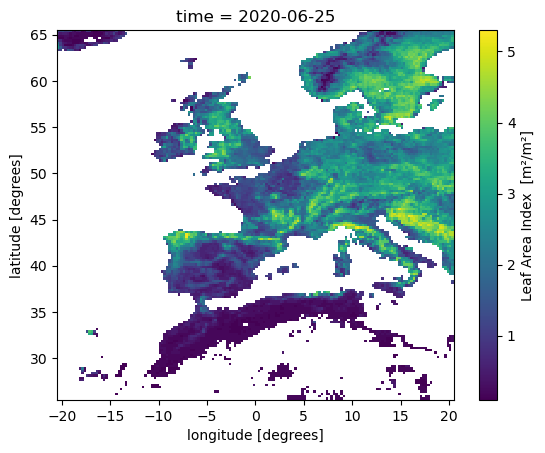

In [15]:
lai_aoi = ds.lai.sel(latitude=slice(65.5,25.5), longitude=slice(-20.5,20.5))
lai_aoi.sel(time=datetime(2020,6,23), method='nearest').plot()


:::{tip}
Have you noticed that latitudes are selected from the largest to the smallest values e.g. `46.5`, `44.5` while longitudes are selected from the smallest to the largest value e.g. `8.5`,`11.5`?
**The reason is that you need to use the same order as the corresponding DataArray**.
:::

# Basic Maths and Stats

In [16]:
# E.g. example scaling 

lai_aoi * 0.0001 + 1500


<xarray.DataArray 'lai' (time: 966, latitude: 160, longitude: 164)> Size: 101MB
dask.array<add, shape=(966, 160, 164), dtype=float32, chunksize=(966, 82, 82), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 1kB 65.38 65.12 64.88 ... 26.12 25.88 25.62
  * longitude  (longitude) float64 1kB -20.38 -20.12 -19.88 ... 20.12 20.38
  * time       (time) datetime64[ns] 8kB 2001-01-01 2001-01-09 ... 2021-12-27

# Statistics and Aggregation
Calculate simple statistics:


In [17]:
lai_aoi.min()
lai_aoi.max()
lai_aoi.mean()

<xarray.DataArray 'lai' ()> Size: 4B
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

Aggregate by month if the dataset spans multiple months:

In [18]:
lai_monthly = lai_aoi.groupby(lai_aoi.time.dt.month).mean()
lai_monthly

<xarray.DataArray 'lai' (month: 12, latitude: 160, longitude: 164)> Size: 1MB
dask.array<transpose, shape=(12, 160, 164), dtype=float32, chunksize=(12, 82, 82), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 1kB 65.38 65.12 64.88 ... 26.12 25.88 25.62
  * longitude  (longitude) float64 1kB -20.38 -20.12 -19.88 ... 20.12 20.38
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

## Masking

Not all values are valid and masking all those which are not in the valid range is necessary. Masking can be achieved through the method `DataSet|Array.where(cond, other)` or `xr.where(cond, x, y)`.

The difference consists in the possibility to specify the value in case the condition is positive or not; `DataSet|Array.where(cond, other)` only offer the possibility to define the false condition value (by default is set to np.NaN))

In [19]:

lai_masked = lai_aoi.where((lai_aoi >= 1.5)) 
lai_masked

<xarray.DataArray 'lai' (time: 966, latitude: 160, longitude: 164)> Size: 101MB
dask.array<where, shape=(966, 160, 164), dtype=float32, chunksize=(966, 82, 82), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 1kB 65.38 65.12 64.88 ... 26.12 25.88 25.62
  * longitude  (longitude) float64 1kB -20.38 -20.12 -19.88 ... 20.12 20.38
  * time       (time) datetime64[ns] 8kB 2001-01-01 2001-01-09 ... 2021-12-27
Attributes:
    aggregation:      Temporal | mean
    creator_notes:    Seasonality in Nan values for high latitudes, due to se...
    description:      The MCD15A2H Version 6 Moderate Resolution Imaging Spec...
    downloaded_from:  https://lpdaac.usgs.gov/products/mcd15a2hv006/
    long_name:        Leaf Area Index 
    provider:         NASA
    units:            m²/m²

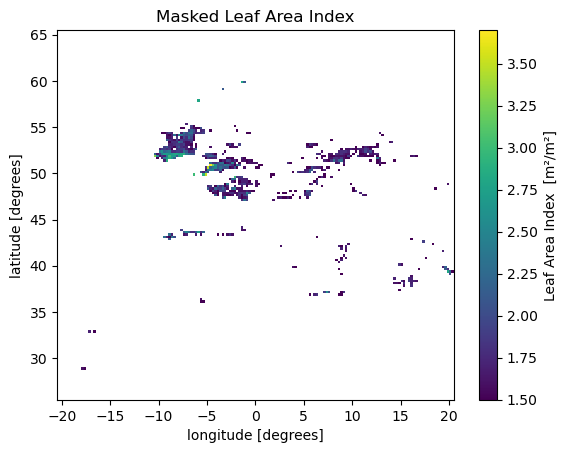

In [20]:
lai_masked.isel(time=0).plot(cmap='viridis')
plt.title("Masked Leaf Area Index")
plt.show()


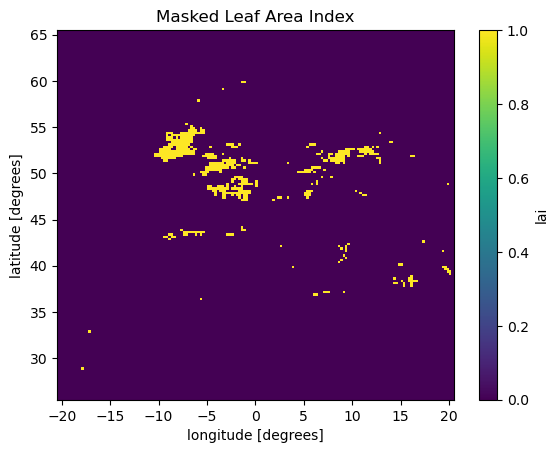

In [21]:
mask = xarray.where((lai_aoi > 1.5), 1, 0)
mask.isel(time=0).plot()
plt.title("Masked Leaf Area Index")
plt.show()


<!-- By inspecting any of the variables on the representation above, you'll see that each data array represents __about 85GiB of data__, so much more than the availabe memory on this notebook server, and even on the Dask Cluster we created above. But thanks to chunking, we can still analyze it! -->